Group no 8: Nishchay Linge Gowda, Sakshi Aryal, Yash Harale

In [ ]:
1. Set-Up:

In [ ]:
import pandas as pd
df = pd.read_csv('Superstore.csv', encoding='latin1')

In [7]:
import pandas as pd
df = pd.read_csv('Superstore.csv', encoding='latin1')
print("Dataset Summary:")
print(df.info())
print("\nNumber of rows and columns:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   floa

2. Basic EDA:

Data Overview:

In [9]:
import pandas as pd

df = pd.read_csv('Superstore.csv', encoding='latin1')

In [15]:
print("First few rows of the dataset:") 
print(df.head())
print("\nDataset Summary:") 
print(df.info())
print("\nNumber of rows and columns:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())


First few rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

Statistical Summary:

In [17]:
import pandas as pd
df = pd.read_csv('Superstore.csv', encoding='latin1')
print("Statistical Summary of Numerical Columns:") 
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].describe())


Statistical Summary of Numerical Columns:
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


Date Conversion:

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date']) 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M') 
print(df[['Order Date', 'Ship Date', 'YearMonth']].head())


  Order Date  Ship Date YearMonth
0 2016-11-08 2016-11-11   2016-11
1 2016-11-08 2016-11-11   2016-11
2 2016-06-12 2016-06-16   2016-06
3 2015-10-11 2015-10-18   2015-10
4 2015-10-11 2015-10-18   2015-10


3. Visualizations and Insights: 

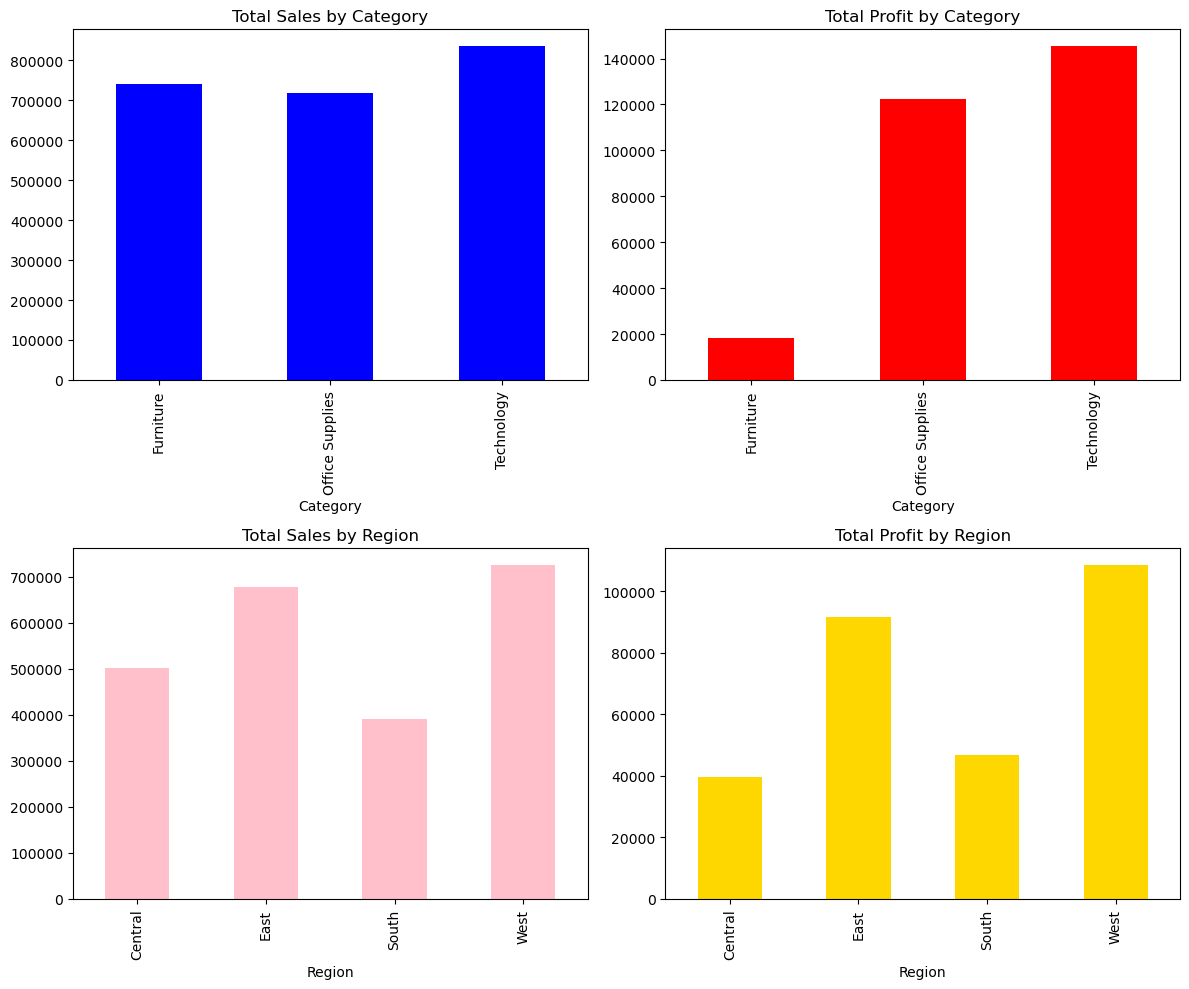

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Superstore.csv', encoding='latin1')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce') 
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
sales_by_category = df.groupby('Category')[['Sales', 'Profit']].sum() 
sales_by_region = df.groupby('Region')[['Sales', 'Profit']].sum()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sales_by_category['Sales'].plot(kind='bar', ax=axes[0, 0], color='blue', title="Total Sales by Category")
sales_by_category['Profit'].plot(kind='bar', ax=axes[0, 1], color='red', title="Total Profit by Category")
sales_by_region['Sales'].plot(kind='bar', ax=axes[1, 0], color='pink', title="Total Sales by Region")
sales_by_region['Profit'].plot(kind='bar', ax=axes[1, 1], color='gold', title="Total Profit by Region")
plt.tight_layout()
plt.show()



Trends Over Time:

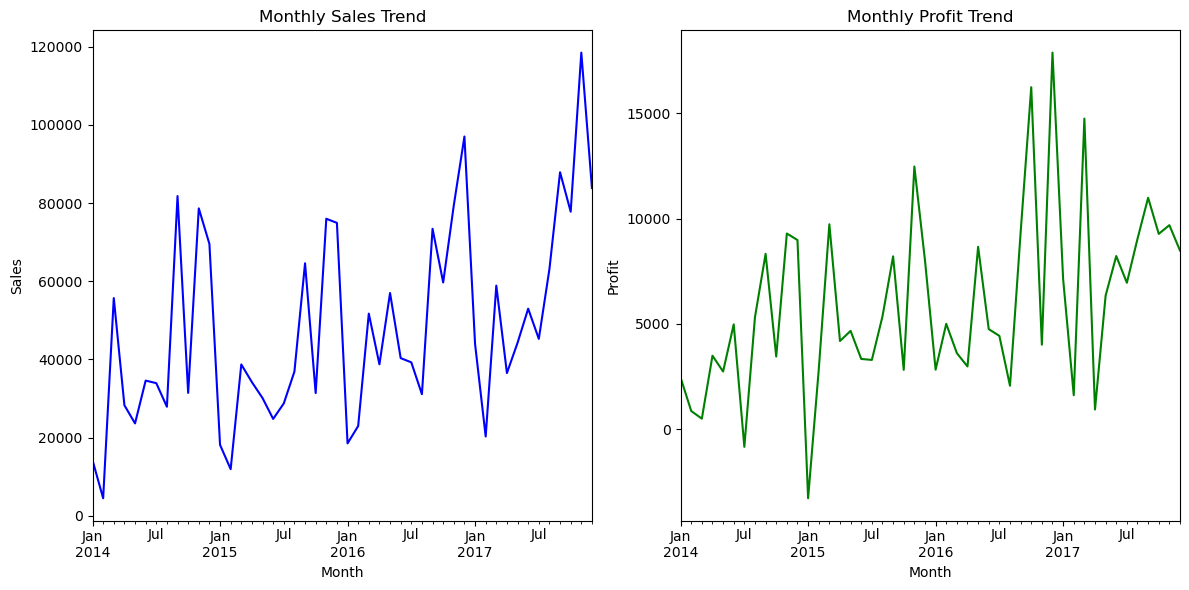

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year-Month'] = df['Order Date'].dt.to_period('M') 
monthly_sales = df.groupby('Year-Month')['Sales'].sum() 
monthly_profit = df.groupby('Year-Month')['Profit'].sum()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
monthly_sales.plot(kind='line', color='blue') 
plt.title('Monthly Sales Trend') 
plt.xlabel('Month')
plt.ylabel('Sales')
plt.subplot(1, 2, 2) 
monthly_profit.plot(kind='line', color='green') 
plt.title('Monthly Profit Trend') 
plt.xlabel('Month')
plt.ylabel('Profit')
plt.tight_layout() 
plt.show()


Correlation Analysis:

In [39]:
correlation_matrix = df[['Sales', 'Quantity']].corr()
print(correlation_matrix)

             Sales  Quantity
Sales     1.000000  0.200795
Quantity  0.200795  1.000000


4. Deepen Analysis:

Sub-category Level Performance:

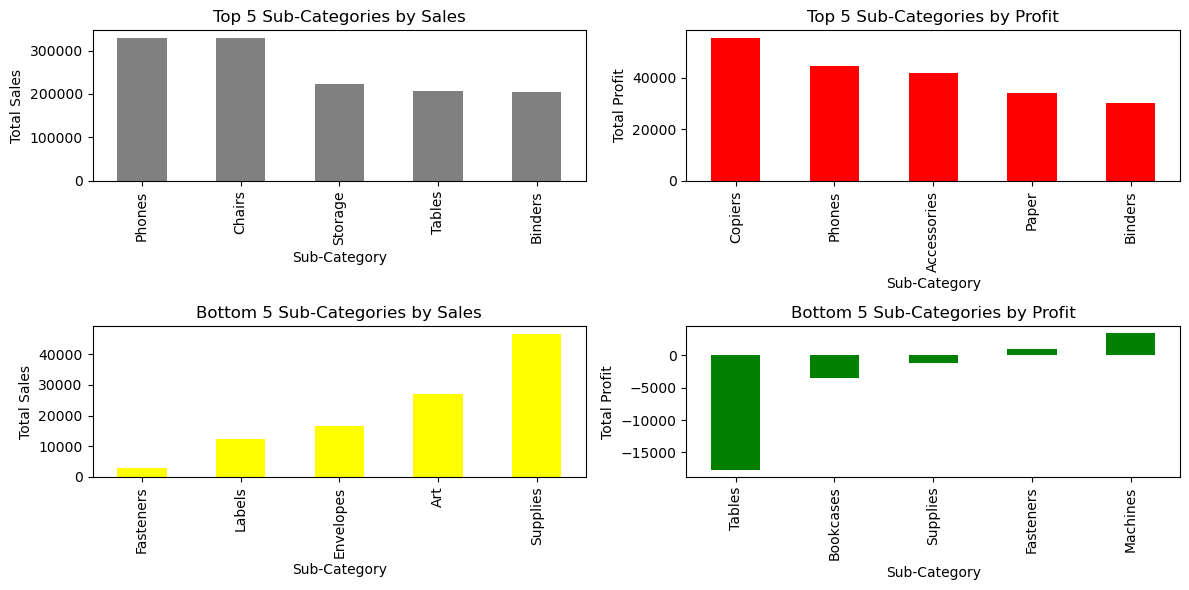

In [45]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum()
top_5_sales = sub_category_sales.sort_values(ascending=False).head(5) 
top_5_profit = sub_category_profit.sort_values(ascending=False).head(5)
bottom_5_sales = sub_category_sales.sort_values().head(5) 
bottom_5_profit = sub_category_profit.sort_values().head(5)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1) 
top_5_sales.plot(kind='bar', color='grey') 
plt.title('Top 5 Sub-Categories by Sales') 
plt.xlabel('Sub-Category') 
plt.ylabel('Total Sales')

plt.subplot(2, 2, 2) 
top_5_profit.plot(kind='bar', color='red') 
plt.title('Top 5 Sub-Categories by Profit') 
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')

plt.subplot(2, 2, 3) 
bottom_5_sales.plot(kind='bar', color='yellow') 
plt.title('Bottom 5 Sub-Categories by Sales') 
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')

plt.subplot(2, 2, 4) 
bottom_5_profit.plot(kind='bar', color='green') 
plt.title('Bottom 5 Sub-Categories by Profit') 
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')

plt.tight_layout() 
plt.show()


Impact of Shipping Modes:

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

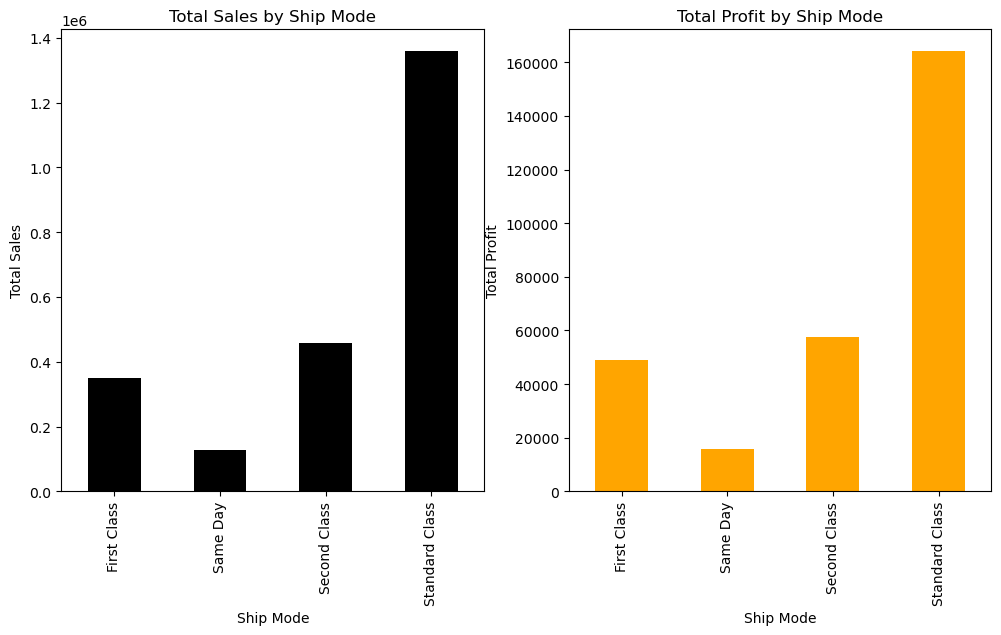

In [47]:
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum() 
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
ship_mode_sales.plot(kind='bar', color='black') 
plt.title('Total Sales by Ship Mode') 
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

# Profit by Ship Mode
plt.subplot(1, 2, 2) 
ship_mode_profit.plot(kind='bar', color='orange') 
plt.title('Total Profit by Ship Mode') 
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

# Display the plots
plt


Customer Segmentation:

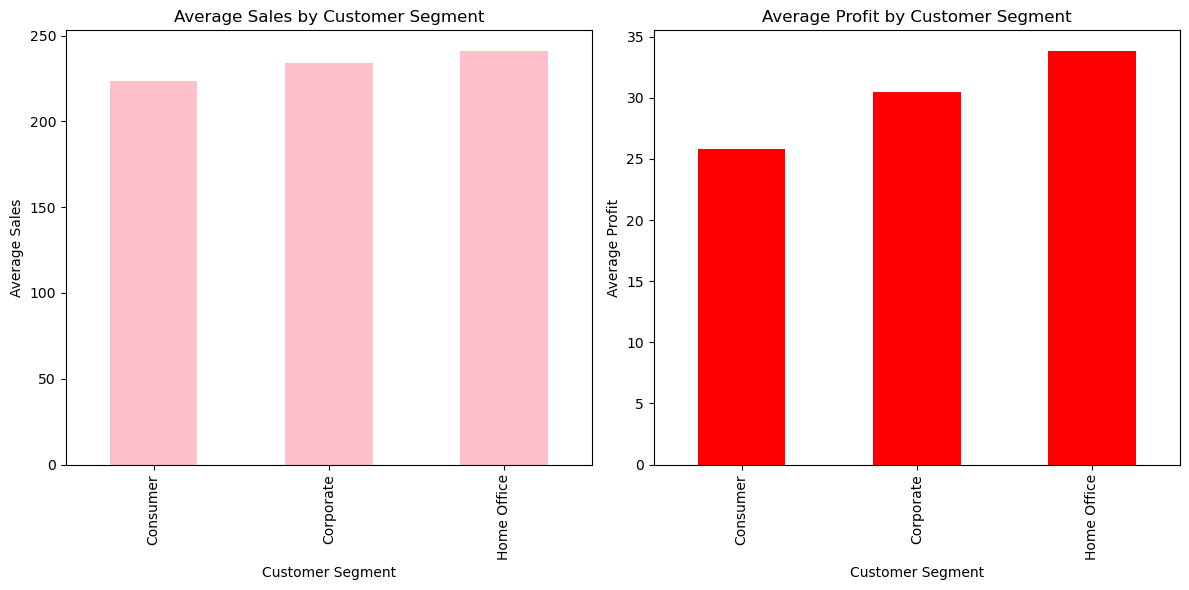

In [49]:
 segment_sales_avg = df.groupby('Segment')['Sales'].mean() 
segment_profit_avg = df.groupby('Segment')['Profit'].mean()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
segment_sales_avg.plot(kind='bar', color='pink') 
plt.title('Average Sales by Customer Segment') 
plt.xlabel('Customer Segment') 
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2) 
segment_profit_avg.plot(kind='bar', color='red') 
plt.title('Average Profit by Customer Segment') 
plt.xlabel('Customer Segment')
plt.ylabel('Average Profit')

plt.tight_layout() 
plt.show()


5.	Marketing Strategy: 

Discount Impact Analysis:

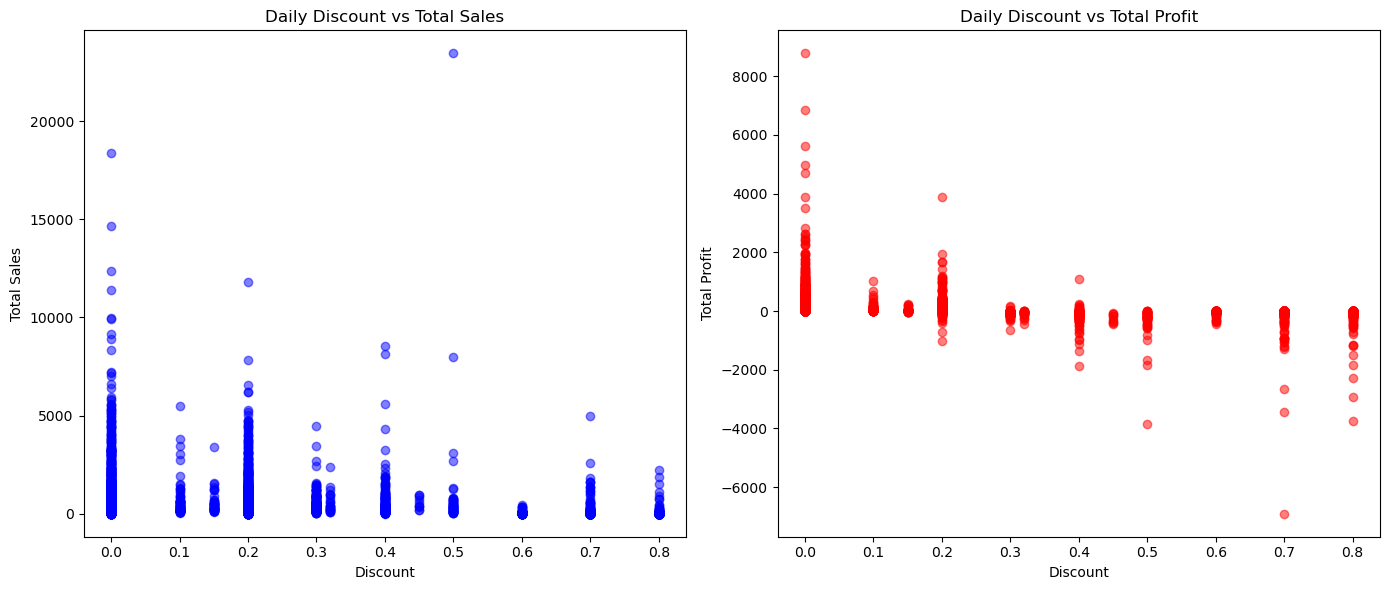

Correlation between daily discount and total sales: -0.2501
Correlation between daily discount and total profit: -0.3485


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date']) 
df['Date'] = df['Order Date'].dt.date 

daily_sales_discount = df.groupby(['Date', 'Discount'])['Sales'].sum().reset_index() 
daily_profit_discount = df.groupby(['Date', 'Discount'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(daily_sales_discount['Discount'], daily_sales_discount['Sales'], alpha=0.5, color='blue')
plt.title('Daily Discount vs Total Sales')
plt.xlabel('Discount') 
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
plt.scatter(daily_profit_discount['Discount'], daily_profit_discount['Profit'], alpha=0.5, color='red')
plt.title('Daily Discount vs Total Profit')
plt.xlabel('Discount') 
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

correlation_sales_discount = daily_sales_discount['Discount'].corr(daily_sales_discount['Sales'])
correlation_profit_discount = daily_profit_discount['Discount'].corr(daily_profit_discount['Profit'])
print(f"Correlation between daily discount and total sales: {correlation_sales_discount:.4f}") 
print(f"Correlation between daily discount and total profit: {correlation_profit_discount:.4f}")


The correlations you provided suggest negative relationships between daily discounts and both total sales and total profit:

Correlation between daily discount and total sales (-0.2501): This weak negative correlation indicates that as daily discounts increase, total sales tend to decrease slightly, but the relationship is not strong. It suggests that higher discounts might not always drive higher sales, or that the increase in sales driven by discounts might not be significant enough to offset other factors influencing sales volume.

Correlation between daily discount and total profit (-0.3485): This moderate negative correlation suggests a stronger negative relationship between daily discounts and total profit. It implies that increasing discounts are associated with a decrease in total profit, likely because discounts reduce the revenue per unit sold. While discounts may boost sales volume in some cases, the lower selling price can erode the profit margin, leading to a reduction in total profit.

Strategic Recommendations:

Based on the provided correlations, the analysis suggests that discounts do not necessarily lead to higher sales or profits:

Sales and Discounts: The weak negative correlation between daily discounts and total sales (-0.2501) indicates that increasing discounts does not strongly correlate with higher sales. This implies that simply offering discounts may not drive significantly higher sales volumes. Other factors, such as product quality, marketing efforts, customer demand, and competition, might play a more significant role in driving sales than the discounts themselves.

Profit and Discounts: The stronger negative correlation between daily discounts and total profit (-0.3485) suggests that offering higher discounts tends to reduce profit margins. While discounts can potentially increase sales volume, they also lower the revenue per unit sold, which can erode profits. Therefore, the store might experience a situation where more discounts lead to less overall profit, even if they do increase the number of items sold.

Strategic Recommendations: Use Discounts Selectively: Instead of offering discounts heavily or indiscriminately, the store should consider using discounts strategically to target specific segments or time periods. For instance, discounts could be used for:

Clearance of End-of-Season or Slow-Moving Inventory: Offering discounts on products that are nearing the end of their lifecycle or have low demand can help reduce inventory costs and generate sales without significantly hurting profits. Special Events or Holidays: Discounts can be part of a broader promotional strategy tied to events like Black Friday, holiday sales, or loyalty program perks to attract customers during peak shopping periods. Tiered Discounting: Implementing tiered discounting, where customers receive larger discounts for higher spending thresholds (e.g., 10% off for purchases over $50, 20% off for purchases over $100), can encourage larger purchases without heavily reducing profit margins on individual items.

Personalized or Targeted Discounts: Offering personalized discounts based on customer behavior or purchase history (such as discounts for loyal customers or targeted promotions) can be more effective in driving sales without sacrificing profits. This approach ensures that discounts are given to customers who are more likely to convert, rather than offering broad, across-the-board reductions that may not have a significant impact.

Focus on Value-Added Offers: Rather than relying on deep discounts, the store could also explore bundling products, offering value-added services, or emphasizing the quality and uniqueness of products. These alternatives can attract customers without resorting to discounting, which often reduces the perceived value of a product.

Given the negative correlation between discounts and profit, the store should not rely heavily on discounts as a primary sales strategy. While occasional and targeted discounts can be part of a successful marketing campaign, heavy discounting may reduce profit margins without yielding a proportionate increase in sales. Instead, the store could consider focusing on value-based selling, bundling, personalized offers, and selective promotions to maintain profitability while still offering incentives to customers.


Questions

Part 1: Basic EDA

1.	Data Overview:

In [55]:
import pandas as pd

df = pd.read_csv('Superstore.csv', encoding='latin1')

rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

print('\nData types of each column:') 
print(df.dtypes)

missing_values = df.isnull().sum() 
print('\nMissing values in each column:') 
print(missing_values)


The dataset contains 9994 rows and 21 columns.

Data types of each column:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity    

2.	Statistical Summary

In [57]:

mean_sales = df['Sales'].mean() 
std_sales = df['Sales'].std() 
print(f'Mean of Sales: {mean_sales}')
print(f'Standard Deviation of Sales: {std_sales}')
 
min_profit = df['Profit'].min() 
max_profit = df['Profit'].max() 
print(f'Minimum Profit: {min_profit}') 
print(f'Maximum Profit: {max_profit}')


Mean of Sales: 229.85800083049833
Standard Deviation of Sales: 623.2451005086818
Minimum Profit: -6599.978
Maximum Profit: 8399.976


3.	Date Conversion:

In [59]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')
unique_year_months = df['YearMonth'].nunique()
print(f'Number of unique YearMonth values: {unique_year_months}')

first_order_date = df['Order Date'].min() 
last_order_date = df['Order Date'].max()
print(f'First Order Date: {first_order_date}') 
print(f'Last Order Date: {last_order_date}')


Number of unique YearMonth values: 48
First Order Date: 2014-01-03 00:00:00
Last Order Date: 2017-12-30 00:00:00


Part 2: Visualizations and Insights

1.	Category Analysis

In [63]:

category_sales = df.groupby('Category')['Sales'].sum() 
highest_sales_category = category_sales.idxmax() 
highest_sales_value = category_sales.max()
print(f'Category with the highest total sales: {highest_sales_category} ({highest_sales_value})')

category_profit = df.groupby('Category')['Profit'].sum() 
highest_profit_category = category_profit.idxmax() 
highest_profit_value = category_profit.max()
print(f'Category with the highest total profit: {highest_profit_category} ({highest_profit_value})')

region_sales = df.groupby('Region')['Sales'].sum() 
lowest_sales_region = region_sales.idxmin() 
lowest_sales_value = region_sales.min()
print(f'Region with the lowest total sales: {lowest_sales_region} ({lowest_sales_value})')


Category with the highest total sales: Technology (836154.033)
Category with the highest total profit: Technology (145454.9481)
Region with the lowest total sales: South (391721.905)


2.	Trends Over Time:

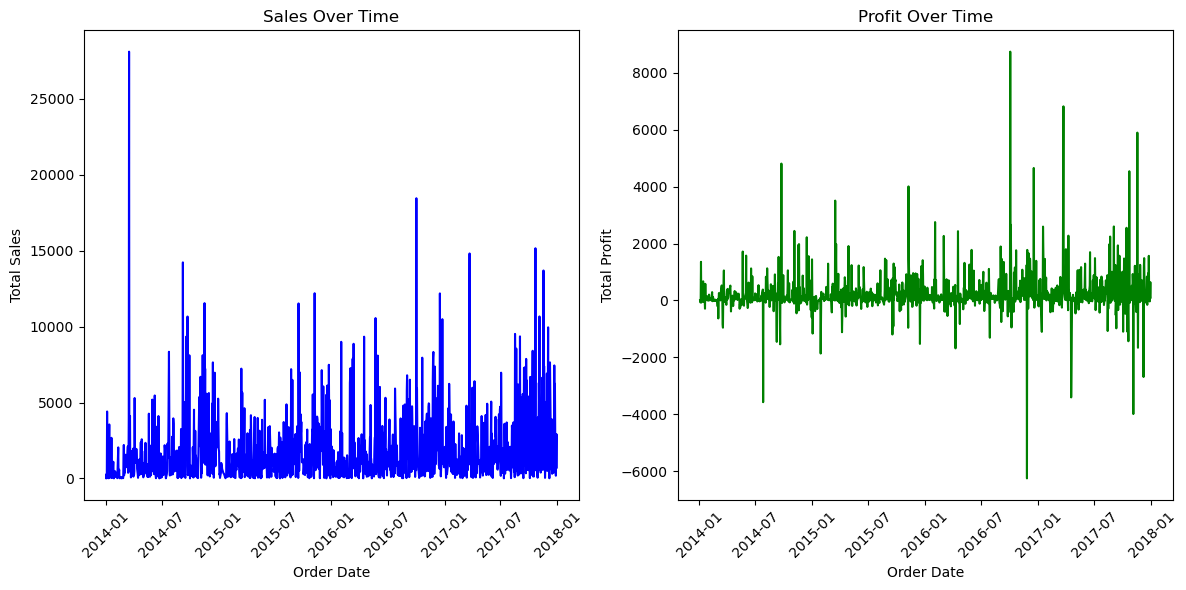

In [65]:
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'])

sales_by_date = df.groupby('Order Date')['Sales'].sum()
profit_by_date = df.groupby('Order Date')['Profit'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sales_by_date, color='blue')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(profit_by_date, color='green')
plt.title('Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



3.	Correlation Analysis:

In [67]:

sales_profit_correlation = df['Sales'].corr(df['Profit']) 
print(f'Correlation between Sales and Profit: {sales_profit_correlation}')

discount_profit_correlation = df['Discount'].corr(df['Profit']) 
print(f'Correlation between Discount and Profit: {discount_profit_correlation}')


Correlation between Sales and Profit: 0.4790643497377061
Correlation between Discount and Profit: -0.21948745637176834


Part 3: Deepen Analysis

1.	Sub-category Level Performance:

In [69]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum() 
top_5_sales_subcategories = sub_category_sales.nlargest(5) 
print('Top 5 Sub-Categories by Total Sales:') 
print(top_5_sales_subcategories)

sub_category_profit = df.groupby('Sub-Category')['Profit'].sum() 
bottom_5_profit_subcategories = sub_category_profit.nsmallest(5) 
print('\nBottom 5 Sub-Categories by Total Profit:') 
print(bottom_5_profit_subcategories)

Top 5 Sub-Categories by Total Sales:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

Bottom 5 Sub-Categories by Total Profit:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64


Insights from the Top 5 Sub-Categories by Total Sales: Phones (Highest Sales):

Phones have the highest total sales, which indicates a strong demand for this product category. However, it's important to investigate its profit margins. If the profit per unit is low due to high production or discounting costs, the high sales volume may not translate to significant profitability. 

Chairs:

Chairs are also among the top-selling categories. This could suggest that the store is effectively meeting customer demand for office furniture. It’s worth analyzing whether the store is using competitive pricing or special promotions to drive these high sales volumes. 

Storage:

The storage category, while not as high as phones and chairs, still contributes significantly to total sales. This could be driven by office supply demand, especially as companies expand their storage needs.

Analyzing the product variety in this category could provide insights into customer preferences. 

Tables:

Tables are another high seller, but their performance in terms of profit should be closely monitored. If sales volumes are high but profit margins are low, the store could be pricing them too aggressively or offering large discounts. 

Binders:
Bindings, though not as high in sales as phones and chairs, still make it into the top 5. Binders may be low-cost but essential products, contributing to overall sales but not necessarily high profit margins. 

Insights from the Bottom 5 Sub-Categories by Total Profit: 

Tables (Negative Profit):

Despite being one of the top sellers, tables show a negative profit, with a significant loss (-$17,725.48). This could indicate that while the tables are selling well, their associated costs (e.g., production, shipping, or heavy discounting) might be too high. The store should review its pricing and cost structure for this category to improve profitability. 

Bookcases (Negative Profit):

Bookcases are another sub-category with negative profit (-$3,472.56). This suggests that while they may have some sales, they are not generating enough profit to cover costs. Similar to tables, over- discounting or high shipping costs could be eroding profit margins. 

Supplies (Negative Profit):

Supplies have a small negative profit (-$1,189.10), suggesting that this category is likely seeing sales but with thin margins. Investigating the pricing strategy, cost of goods sold, and any discounts applied could help optimize profitability. 

Fasteners (Low Positive Profit):
 
Fasteners show a small positive profit ($949.52), indicating that while this category is not performing poorly, it still requires improvement. This could be due to low sales volume or other factors affecting profitability, such as pricing or competition. Reviewing these aspects could help boost profits in this category. 

Machines (Low Positive Profit):
Machines are generating a relatively small positive profit ($3,384.76), which may indicate low volume sales or tight profit margins. If this category has potential for growth, focusing on increasing sales and optimizing costs can help enhance profitability.

Strategic Recommendations: 

For Top Sales Categories (Phones, Chairs, Storage, Tables, Binders):

Profitability Optimization: While these categories have high sales, some are showing low or negative profits (e.g., Tables and Bookcases). Focus on improving profit margins by reducing costs, optimizing pricing strategies, or reducing over-discounting. Product Differentiation and Promotions: For categories with high sales but low profit margins, consider bundling products or offering value-added services (e.g., free delivery, extended warranties) to enhance profitability. 

For Bottom Profit Categories (Tables, Bookcases, Supplies, Fasteners, Machines):

Cost Reduction: 

Investigate the underlying costs of production, shipping, and handling for these categories. For example, renegotiating supplier contracts or optimizing inventory management could help reduce costs. Pricing Strategy Review: Review the pricing strategies for these categories. Are discounts or promotions eating into profits? Consider adjusting prices or introducing tiered pricing based on customer segments. Focus on High-Margin Items: For categories like Machines and Fasteners, explore ways to increase sales while maintaining healthy profit margins. This may involve targeting niche markets, increasing visibility, or promoting higher-margin variants.



2.	Impact of Shipping Modes:

In [79]:

avg_sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].mean()
highest_avg_sales_ship_mode = avg_sales_by_ship_mode.idxmax()
highest_avg_sales_value = avg_sales_by_ship_mode.max()

print(f'Shipping mode with the highest average sales: {highest_avg_sales_ship_mode} ({highest_avg_sales_value:.2f})')

avg_profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].mean()
highest_avg_profit_ship_mode = avg_profit_by_ship_mode.idxmax()
highest_avg_profit_value = avg_profit_by_ship_mode.max()

print(f'Shipping mode with the highest average profit: {highest_avg_profit_ship_mode} ({highest_avg_profit_value:.2f})')


Shipping mode with the highest average sales: Same Day (236.40)
Shipping mode with the highest average profit: First Class (31.84)


3.	Customer Segmentation:

In [77]:
avg_sales_by_ship_mode = df.groupby('Segment')['Sales'].mean()
highest_avg_sales_ship_mode = avg_sales_by_ship_mode.idxmax()
highest_avg_sales_value = avg_sales_by_ship_mode.max()

print(f'Shipping mode with the highest average sales: {highest_avg_sales_ship_mode} ({highest_avg_sales_value:.2f})')

avg_profit_by_ship_mode = df.groupby('Segment')['Profit'].mean()
highest_avg_profit_ship_mode = avg_profit_by_ship_mode.idxmax()
highest_avg_profit_value = avg_profit_by_ship_mode.max()

print(f'Shipping mode with the highest average profit: {highest_avg_profit_ship_mode} ({highest_avg_profit_value:.2f})')


Shipping mode with the highest average sales: Home Office (240.97)
Shipping mode with the highest average profit: Home Office (33.82)


Insights from the Customer Segmentation Analysis: 

Highest Average Sales Segment:

The segment with the highest average sales indicates that it contributes the most to the overall sales volume. Understanding the characteristics of this segment (e.g., Consumer, Corporate, Home Office) can help tailor marketing strategies and product offerings. If this segment is large, focusing on retaining and expanding it could significantly boost revenue. 

Highest Average Profit Segment:

The segment with the highest average profit is crucial because it directly influences profitability. Even if a segment has lower sales compared to others, if it generates high profit, it could be more valuable in the long term. This segment may be more responsive to pricing strategies or may have higher margins on products. Identifying the needs and preferences of this segment can allow for more targeted strategies to increase profitability.

Target High-Profit Segments: 

Focus on increasing sales in segments with high average profit, as they are already more profitable. Consider upselling or cross-selling high-margin products to these segments.

Optimize Sales in High-Sales Segments: 

For segments with high average sales but possibly lower profits, consider ways to increase profit margins (e.g., by reducing costs, increasing pricing, or minimizing discounts) while maintaining sales volume.


Part 4: Marketing Strategy

1.	Discount Impact Analysis:

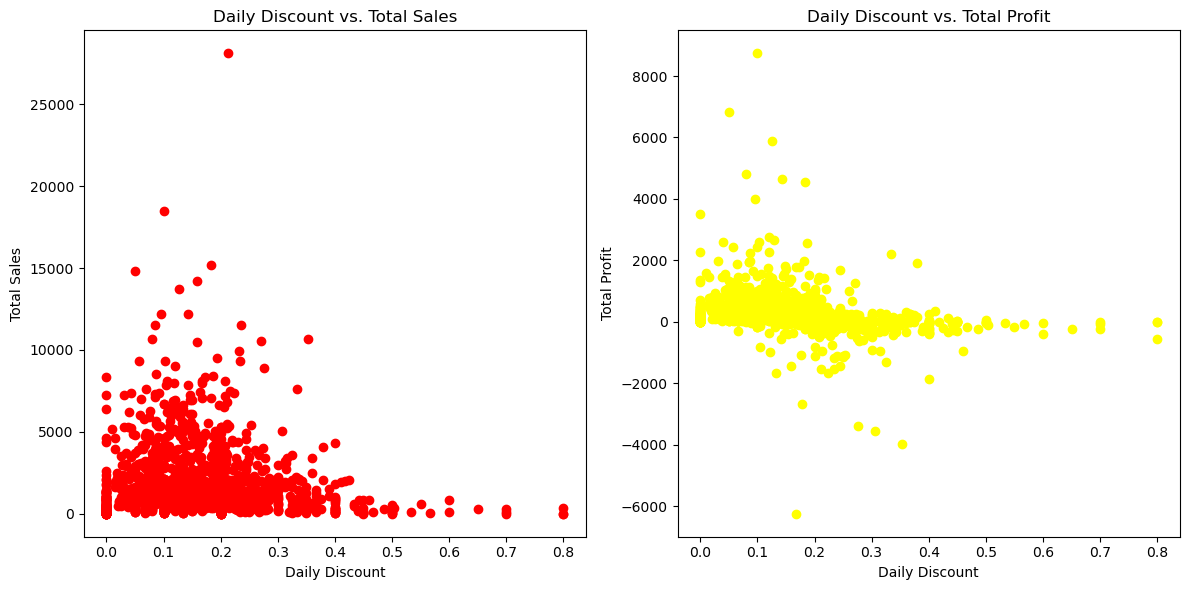

Correlation between Daily Discount and Total Sales: -0.04473358676640084
Correlation between Daily Discount and Total Profit: -0.22840256183279728


In [81]:
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date']) 
df['YearMonth'] = df['Order Date'].dt.to_period('M')

daily_sales = df.groupby('Order Date')['Sales'].sum() 
daily_profit = df.groupby('Order Date')['Profit'].sum() 
daily_discount = df.groupby('Order Date')['Discount'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(daily_discount, daily_sales, color='red') 
plt.title('Daily Discount vs. Total Sales') 
plt.xlabel('Daily Discount')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
plt.scatter(daily_discount, daily_profit, color='yellow') 
plt.title('Daily Discount vs. Total Profit') 
plt.xlabel('Daily Discount')
plt.ylabel('Total Profit')

plt.tight_layout() 
plt.show()

discount_sales_corr = daily_discount.corr(daily_sales) 
discount_profit_corr = daily_discount.corr(daily_profit)

print(f'Correlation between Daily Discount and Total Sales: {discount_sales_corr}') 
print(f'Correlation between Daily Discount and Total Profit: {discount_profit_corr}')


The correlation results show the following:

Correlation between Daily Discount and Total Sales: 

-0.0447:

This correlation is very close to zero, suggesting there is almost no linear relationship between the daily discount and total sales. A negative value indicates that as discounts increase, sales tend to decrease slightly, but the relationship is so weak that it's not meaningful. Therefore, daily discounts do not appear to significantly affect total sales in this dataset. 

Correlation between Daily Discount and Total Profit:

-0.2284:

This correlation is negative but relatively weak. It suggests that there is a small inverse relationship between discounts and profit. As the daily discount increases, the total profit tends to decrease, although the correlation is not strong enough to draw definitive conclusions. This likely indicates that higher discounts reduce profit margins, especially if the discount exceeds the increase in sales volume.

Discussion: 

For Sales: 

Since the correlation between daily discount and total sales is almost zero, it implies that discounts do not have a significant direct impact on sales volume in this case. It's possible that customers are not responding strongly to discounts, or the discounting strategy may not be well- aligned with the products that drive the most sales.

For Profit: 

The negative correlation with profit suggests that discounts are likely reducing profit margins, which is typical in many retail scenarios. While offering discounts can lead to higher sales in some cases, the impact on profit can be detrimental if the discounts are too deep or not compensated by a significant increase in sales volume.

2.	Strategic Recommendations:

Analysis of Discounts' Impact on Sales and Profits: Sales and Discounts:

The correlation between daily discount and total sales is very weak (-0.0447), meaning discounts do not have a significant impact on increasing sales. While discounts are often used to boost sales, in this case, it seems that higher discounts do not lead to significantly higher sales volumes. This could suggest that the store's discounting strategy may not be effective in driving substantial customer demand. 

Profits and Discounts:
 
The negative correlation between daily discount and total profit (-0.2284) suggests that higher discounts are associated with lower profits. This is expected, as offering discounts often reduces the margin on each product sold, which can erode profitability unless compensated by a substantial increase in sales. However, the weak correlation indicates that the store's discounting is not extreme enough to drastically harm profit, though it is still a factor to consider. 

Strategic Recommendations for Using Discounts: 

Reevaluate the Discount Strategy:

Given that discounts don't appear to have a strong impact on increasing sales and may reduce profit margins, it is essential for the store to reconsider how heavily they rely on discounts. If the main goal is increasing sales, it may be more effective to target the right customer segments or use promotions that create a sense of urgency (e.g., limited-time offers or bundling) rather than simply offering broad discounts. 

Segment-Based Targeting:

Rather than applying blanket discounts across all products, the store should consider targeted discounting strategies. 

For example: 

For low-demand products: 

Apply discounts to clear out inventory that is not selling well. 

For high-margin products: 

Offer smaller, more selective discounts that increase sales without significantly impacting profitability. 

Customer Segments: 

Offer discounts to specific segments (e.g., loyal customers, high-value customers) where discounts are likely to generate increased loyalty and repeat business. 

Use Data-Driven Pricing:

Instead of heavy discounts, the store could implement a dynamic pricing strategy where prices are optimized based on demand, competition, and customer behavior. This approach could help maintain profitability while still being competitive.

Bundle Offers and Value-Added Promotions:

Instead of direct discounts, the store could use bundling or cross-selling strategies. For instance, offering a bundle of products at a discounted price (e.g., a "buy one, get one at a reduced price" offer) could increase the overall sales volume while protecting profit margins. Value-Added Promotions: Offering free shipping, extended warranties, or exclusive access to new products could create value for customers without heavily discounting the products themselves. 

Focus on Customer Experience:

Instead of focusing solely on discounts to drive sales, investing in improving the customer experience could yield better long-term results. Personalized recommendations, loyalty rewards, and exceptional customer service can help increase repeat business and customer lifetime value without relying on heavy discounting.

Should the Store Continue Using Discounts Heavily?

Based on the analysis, discounts should not be the primary tool for driving sales or profit. The weak correlation between discounts and sales suggests that customers might not be highly responsive to them, and the negative correlation with profits indicates that they are eroding margins. Instead, the store should adopt a more strategic approach to discounting, focusing on targeted promotions and using other marketing tools like bundling, value-added services, and data-driven pricing to maintain profitability while still stimulating sales.

